Some Imports

In [148]:
from matplotlib import pyplot as plt
import torch
import math
from config import *
from vae import VAE
import numpy as np
from dataset import fetch_data, fetch_dataset

Image Denormalization and Plotting

In [149]:
def normalize(img):
    img_arr = np.array(img)

    for i in range(3):
        img_arr[:,:,i] = (img_arr[:,:,i] - img_arr[:,:,i].min()) * 255 / (img_arr[:,:,i].max() - img_arr[:,:,i].min())
    
    return np.uint8(img_arr)

def plot_images(images, n_cols = 6):
    n_rows = len(images)//n_cols
    plt.figure(figsize=(1.5 * n_cols, 1.8 * n_rows))
    plt.subplots_adjust(bottom=0.05, left=.05, right=.95, top=.90, hspace=.30)
    for i in range(len(images)):
        plt.subplot(n_rows , n_cols, i+1)
        plt.imshow(images[i], cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        # if with_title:
        #     plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

Loading VAE Model

In [150]:
model = VAE(INPUT_CHANNEL, LATENT_DIM).to(DEVICE)
model = torch.load('output/Beta-VAE ModelV2 with beta=5, latent dims=8100, epochs=200, LR=0.001.pth').to(DEVICE)

Load Data

In [151]:
data, attributes = fetch_data()

Latent Representation, latent vector and manipulation of images

In [152]:
def to_latent(images):
    with torch.no_grad():
        inputs = torch.FloatTensor(images).to(DEVICE).permute(0, 3, 1, 2) / 255.0
        model.eval()
        mu, logvar = model.encode(inputs)
        latents = model.reparameterize(mu, logvar)    
        return latents

def from_latent(latents):
    with torch.no_grad():
        latents = latents.to(DEVICE)
        model.eval()
        outputs = model.decode(latents).permute(0, 2, 3, 1).squeeze(0).cpu().numpy()
        return outputs
    
def change_representation(ids, latent_vector):
    original_imgs = []
    modified_imgs = []
    for id in ids[:6]:
        img = data[id:id+1]
        latent_representation = to_latent(img)
        latent_representation[0] += latent_vector
        img_new = from_latent(latent_representation)
        original_imgs.append(img[0])
        modified_imgs.append(normalize(img_new))
        # images = [img[0], normalize(img_new)]
        # plot_images(images, n_cols=2)
    plot_images(original_imgs, n_cols=6)
    plot_images(modified_imgs, n_cols=6)

In [153]:
N= 50
smile_ids = attributes['Smiling'].sort_values(ascending=False).head(N).index.values
smile_data = data[smile_ids]

no_smile_ids = attributes['Smiling'].sort_values(ascending=True).head(N).index.values
no_smile_data = data[no_smile_ids]

eyeglasses_ids = attributes['Eyeglasses'].sort_values(ascending=False).head(N).index.values
eyeglasses_data = data[eyeglasses_ids]

no_eyeglasses_ids = attributes['Eyeglasses'].sort_values(ascending=True).head(N).index.values
no_eyeglasses_data = data[no_eyeglasses_ids]

sunglasses_ids = attributes['Sunglasses'].sort_values(ascending=False).head(N).index.values
sunglasses_data = data[sunglasses_ids]

no_sunglasses_ids = attributes['Sunglasses'].sort_values(ascending=True).head(N).index.values
no_sunglasses_data = data[no_sunglasses_ids]

# plot_images(smile_data[:6])
# plot_images(no_smile_data[:6])

# plot_images(eyeglasses_data[:6])
# plot_images(no_eyeglasses_data[:6])

# plot_images(sunglasses_data[:6])
# plot_images(no_sunglasses_data[:6])

In [154]:
xx = to_latent(smile_data).cpu().numpy()
xx.shape
xx = [i.reshape(90, 90) for i in xx]
# plot_images(xx)

In [155]:
smile_latent = to_latent(smile_data).mean(axis=0)
no_smile_latent = to_latent(no_smile_data).mean(axis=0)
smile_vec = smile_latent-no_smile_latent

sunglasses_latent = to_latent(sunglasses_data).mean(axis=0)
no_sunglasses_latent = to_latent(no_sunglasses_data).mean(axis=0)
sunglasses_vec = sunglasses_latent-no_sunglasses_latent

eyeglasses_latent = to_latent(eyeglasses_data).mean(axis=0)
no_eyeglasses_latent = to_latent(no_eyeglasses_data).mean(axis=0)
eyeglasses_vec = eyeglasses_latent-no_eyeglasses_latent

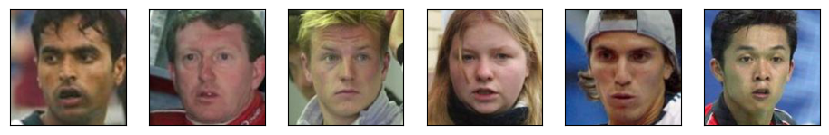

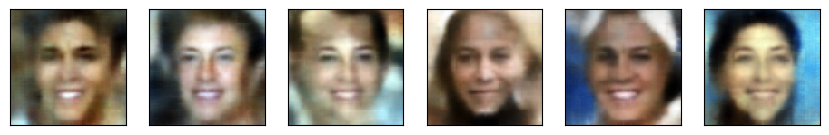

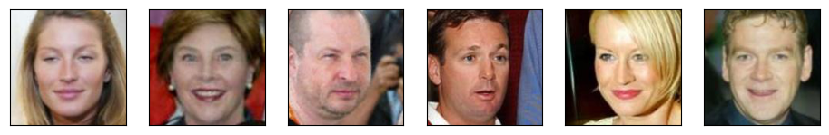

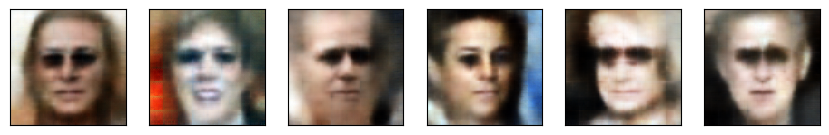

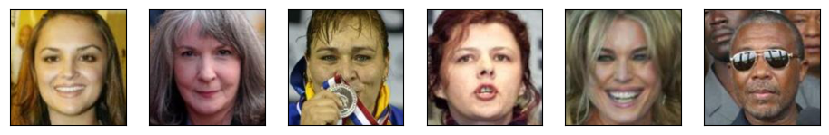

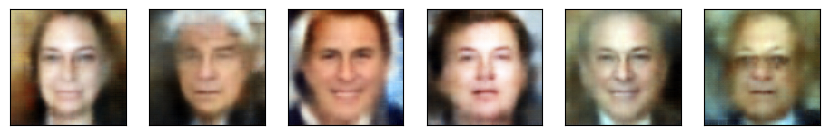

In [156]:
change_representation(no_smile_ids, smile_vec )
change_representation(no_sunglasses_ids, sunglasses_vec )
change_representation(no_eyeglasses_ids, eyeglasses_vec )